# Ambiental Radioactivity by M. Green - Chain 238U
In this notebook, we analyse the events contained in the root file by Matt Green about ambiental radioactivity of Thorium. He said that they simulated the full **238U-chain**.

## File: `A238_Z92` (*i.e Uranium's decay chain*)
Explaination of the name: A=238, Z=92 is **238U**, an isotope of Uranium. 
The name suggests to contain the simulation of the full 238U-chain.

In [1]:
import pandas as pd
import os

# Since input file is large, we have to distribute the workload
filepath1 = os.path.join("..", "Data", "output_AmbRad_A238_Z92_100000_part1.csv")
filepath2 = os.path.join("..", "Data", "output_AmbRad_A238_Z92_100000_part2.csv")
filepath3 = os.path.join("..", "Data", "output_AmbRad_A238_Z92_100000_part3.csv")
filepath4 = os.path.join("..", "Data", "output_AmbRad_A238_Z92_100000_part4.csv")
# create multiple dataframes
df1 = pd.read_csv(filepath1, index_col=False)
df2 = pd.read_csv(filepath2, index_col=False)
df3 = pd.read_csv(filepath3, index_col=False)
df4 = pd.read_csv(filepath4, index_col=False)
# concatenate the dfs in a single one and force the mem release
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
del df1
del df2
del df3
del df4

## Atoms involved in this simulation.

In [2]:
print(sorted(df.PID.unique()))

[-11,
 11,
 22,
 1000020040,
 1000180360,
 1000180400,
 1000320740,
 1000320760,
 1000822060,
 1000822100,
 1000822140,
 1000832100,
 1000832109,
 1000832140,
 1000832149,
 1000842100,
 1000842149,
 1000842180,
 1000862220,
 1000882260,
 1000902300,
 1000922380]

These are:
- `PID=-11, 11, 22` positrons, electrons, photons
- `PID=1000020040` Helium isotope 4He
- `PID=1000180360, 1000180380, 1000180400` Argon isotopes 36Ar, 38Ar and 40Ar
- `PID=1000320740, 1000320760` Germanium isotopes 74Ge and 76Ge
- `PID=1000822060, 1000822100, 1000822140` Lead isotopes 206Pb, 210Pb and 214Pb
- `PID=1000832100/9, 1000832140/9` Bismuth isotopes 210Bi, 210Bi*, 214Bi, 214Bi*
- `PID=1000842100/9, 1000832180` Polonium isotopes 210Po, 210Po*, 218Po
- `PID=1000862220` Radon isotope 222Rn
- `PID=1000882260` Radium isotope 226Ra
- `PID=1000902300` Thorium isotope 230Th
- `PID=1000922380` Uranium isotope 238U

**Questions**:
1. We can notice some excited states. Their simulation has been supported by G4 or they manually simulated that? (*Check email by CJ, maybe it was referring to this*)

## Energy depositions
**Note** that since (*probably*) there are cuts on particles, the energy deposition in the next analysis is only a partial description of the real energy deposition.

In [3]:
edep_entries = df[df.energydeposition>0].energydeposition.reset_index()
edep_gby_event = df.groupby("eventnumber").energydeposition.sum().reset_index()
edep_gby_event.columns = ['eventnumber', 'cum_edep']    # to distinguish

pd.DataFrame([edep_entries.energydeposition.describe(), edep_gby_event.cum_edep.describe()])

,count,mean,std,min,25%,50%,75%,max
energydeposition,17447426.0,0.026453,0.174849,6.226340e-11,0.001985,0.013213,0.023597,6.76294
cum_edep,99999.0,4.615344,4.285818,1.622770e-02,2.793265,3.453969,4.256391,46.53184


In [4]:
del edep_entries
del edep_gby_event

The deposited energy is very low, in the order of few units (keV or MeV???).

**Questions**:
1. What are the units used in MC out scheme (*Edep is keV? Time is ns?*)? Maybe Giuseppe and Danila can recognize the units...

## Time distribution

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

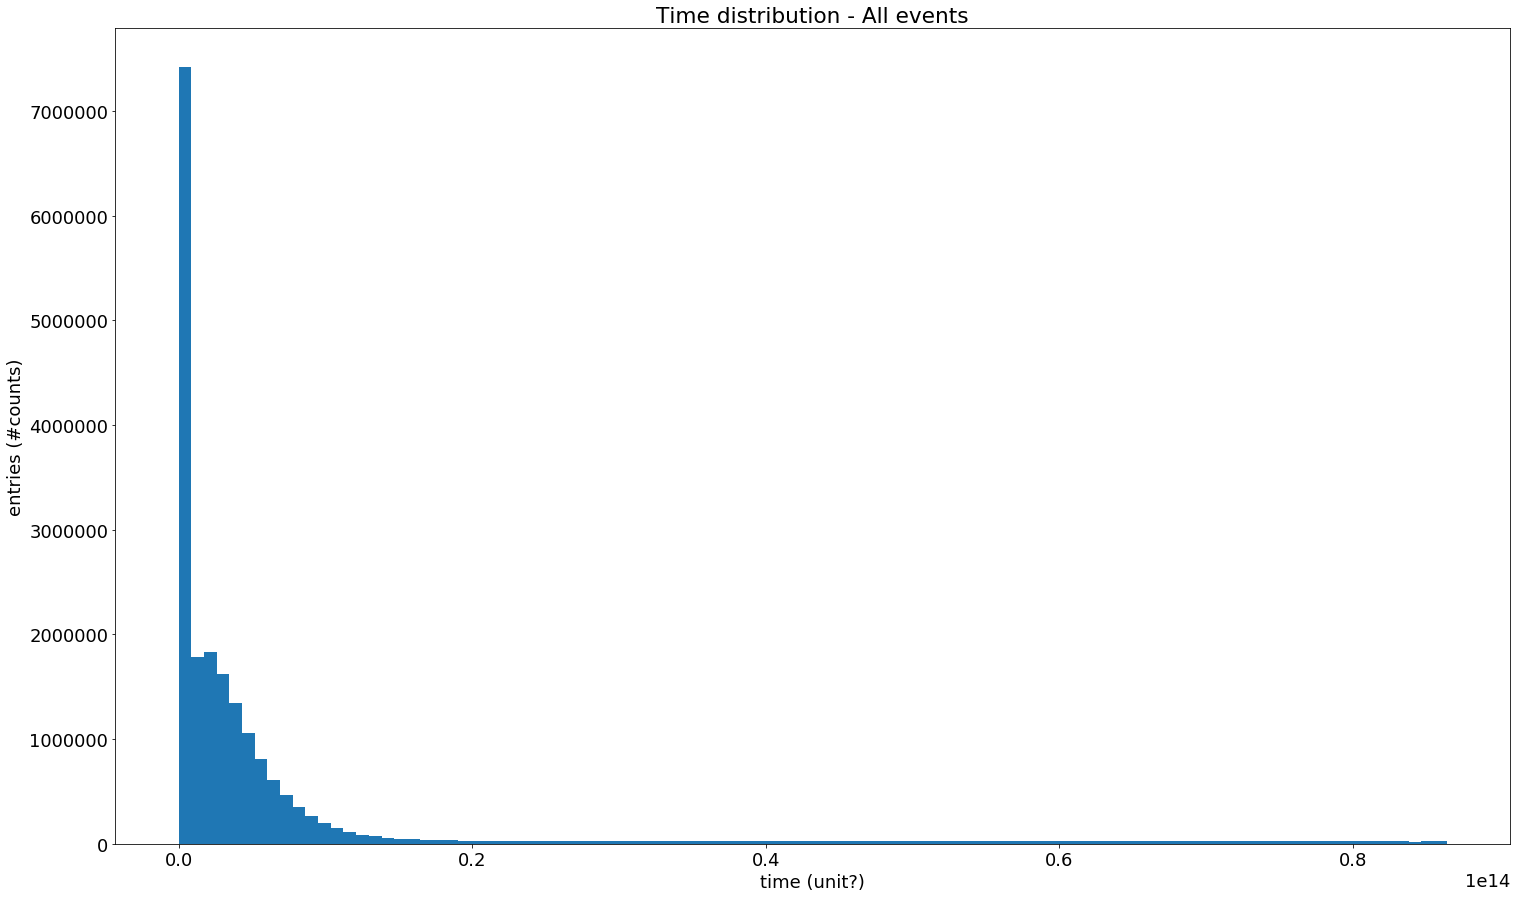

In [13]:
fig, ax = plt.subplots()
ax.hist(df.time, 100)
ax.set_title("Time distribution - All events")
ax.set_xlabel("time (unit?)")
ax.set_ylabel("entries (#counts)")
plt.show()

## Space distribution
### All entries

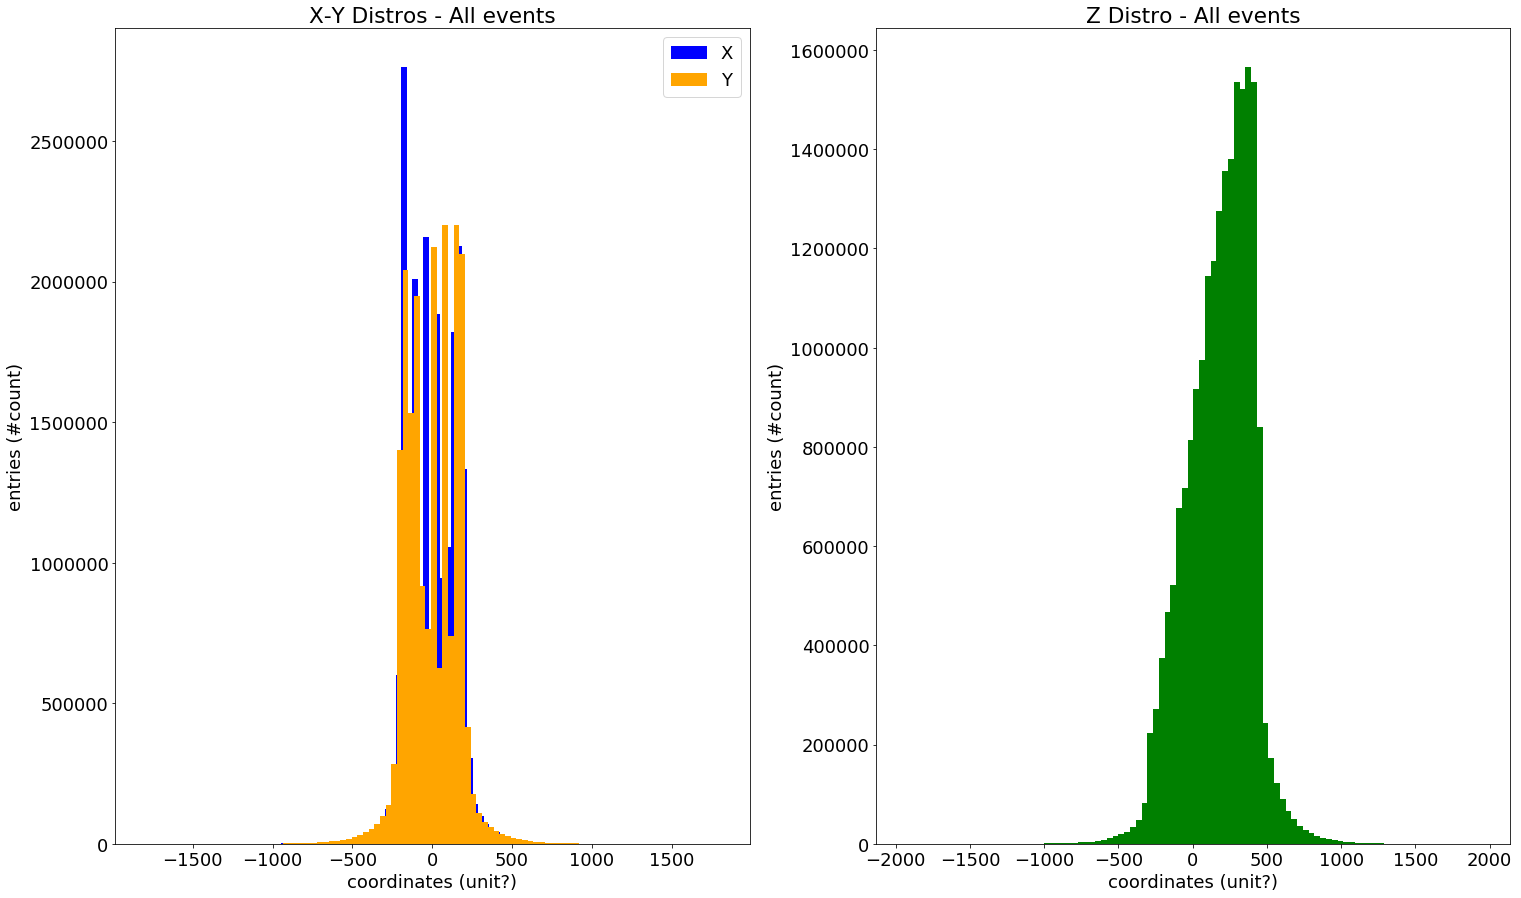

,x,y,z
count,2.045736e+07,2.045736e+07,2.045736e+07
mean,5.297356e-01,-3.171292e-01,1.834169e+02
std,1.620179e+02,1.616788e+02,2.190680e+02
min,-1.803680e+03,-1.750490e+03,-1.936530e+03
25%,-1.227650e+02,-1.442760e+02,3.742660e+01
50%,1.384420e+00,-2.797930e-02,2.102090e+02
75%,1.228790e+02,1.437330e+02,3.466730e+02
max,1.623910e+03,1.807100e+03,1.945440e+03


In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)
nbins = 100
ax1.hist(df.x, nbins, label='X', color='b')
ax1.hist(df.y, nbins, label='Y', color='orange')
ax2.hist(df.z, nbins, label='Z', color='g')
ax1.set_title("X-Y Distros - All events")
ax2.set_title("Z Distro - All events")
ax1.set_xlabel("coordinates (unit?)")
ax2.set_xlabel("coordinates (unit?)")
ax1.set_ylabel("entries (#count)")
ax2.set_ylabel("entries (#count)")
ax1.legend()
plt.show()

pd.DataFrame(df[["x", "y", "z"]].describe())

#### Observations:
- The space distribution ranges in the whole LAr volume (*x, y, z in ~[-1950, +1950]*).
- We can see a greater focus around the origin.


**Questions:** 
1. The sampling x, y, z is *uniform*? Maybe they defined a sensitive area to write only entries around the ROI.

### Only Primary events

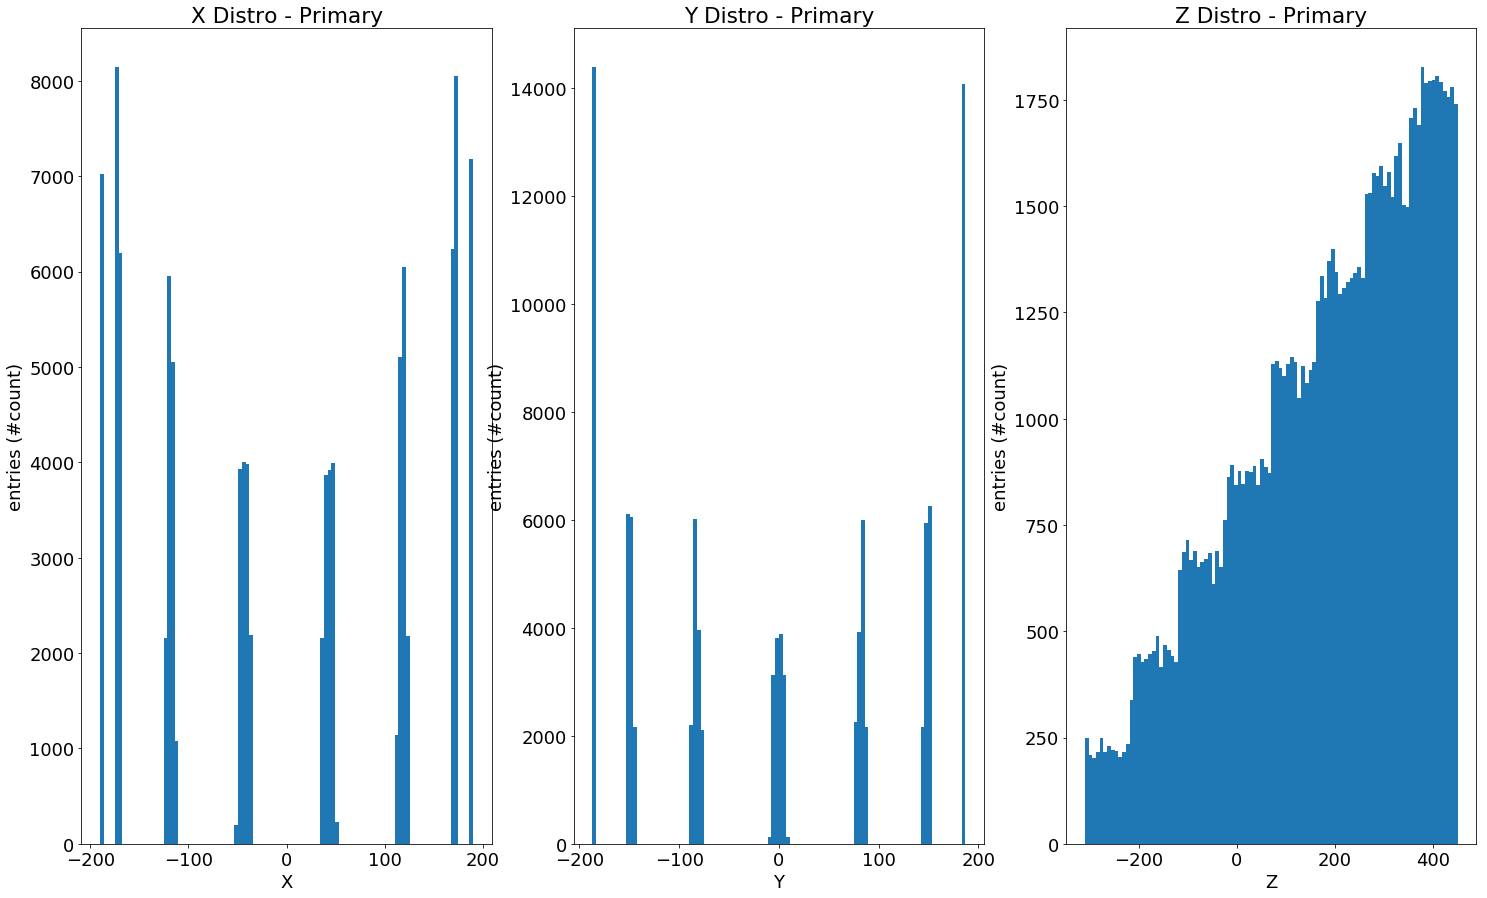

                  x             y             z
count  99999.000000  99999.000000  99999.000000
mean       0.435503     -0.403117    181.020285
std      134.397918    134.359367    189.291564
min     -190.100000   -187.002000   -309.958000
25%     -121.358000   -146.248500     47.788250
50%       34.959600     -0.003416    212.646000
75%      121.368000    146.233000    340.936500
max      190.100000    187.003000    449.997000


In [15]:
primary_xyz = df[["x", "y", "z", "time", "eventnumber"]].sort_values("time").groupby("eventnumber").first()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
nbins = 100
ax1.hist(primary_xyz.x, nbins, label='X')
ax2.hist(primary_xyz.y, nbins, label='Y')
ax3.hist(primary_xyz.z, nbins, label='Z')
ax1.set_title("X Distro - Primary")
ax2.set_title("Y Distro - Primary")
ax3.set_title("Z Distro - Primary")
ax1.set_xlabel("X")
ax2.set_xlabel("Y")
ax3.set_xlabel("Z")
ax1.set_ylabel("entries (#count)")
ax2.set_ylabel("entries (#count)")
ax3.set_ylabel("entries (#count)")
plt.show()

print(primary_xyz[["x", "y", "z"]].describe())
del primary_xyz

**Observations**
- all the coordinates are sampled in a bounded region around the origin (+/- 200)
- x, y distributions are weird: they seem some sort of discrete sampling.